In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [6]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\archive (4)\drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [20]:
data.dropna(axis=0,inplace=True)
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['BP']=le.fit_transform(data['BP'])
data['Cholesterol']=le.fit_transform(data['Cholesterol'])
data['Drug']=le.fit_transform(data['Drug'])

In [13]:
y=data['Drug']
x=data.drop('Drug',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=44)
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)
model=LogisticRegression()
p=model.fit(xtrain_scaled,ytrain)
xt=p.predict(xtest_scaled)
print("accuracy score is:",accuracy_score(ytest,xt)*100)

accuracy score is: 80.0


In [14]:
conf_matrix=confusion_matrix(ytest,xt)
print('\nCONFUSION MATRIX\n',conf_matrix)


CONFUSION MATRIX
 [[ 4  0  0  0  1]
 [ 2  4  0  0  2]
 [ 0  0  4  0  0]
 [ 0  0  0 15  7]
 [ 0  0  0  0 21]]


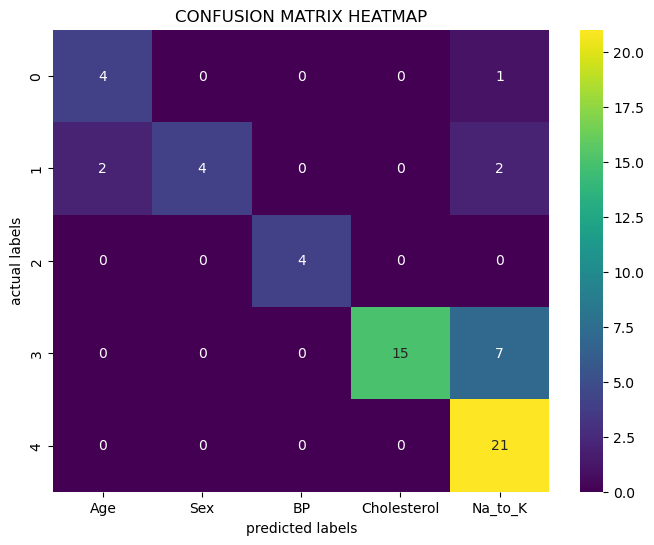

In [30]:
plt.figure(figsize=(8,6))
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis',xticklabels=x.columns,yticklabels=le.classes_)
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()

In [22]:
new_value=pd.DataFrame({
    'Age':[23],
    'Sex':[0],
    'BP':[0],
    'Cholesterol':[0],
    'Na_to_K':[25.355],
})
xt=p.predict(new_value)
print("predicted value is:",xt)
print("actual value is:",y[0])

predicted value is: [4]
actual value is: 4


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


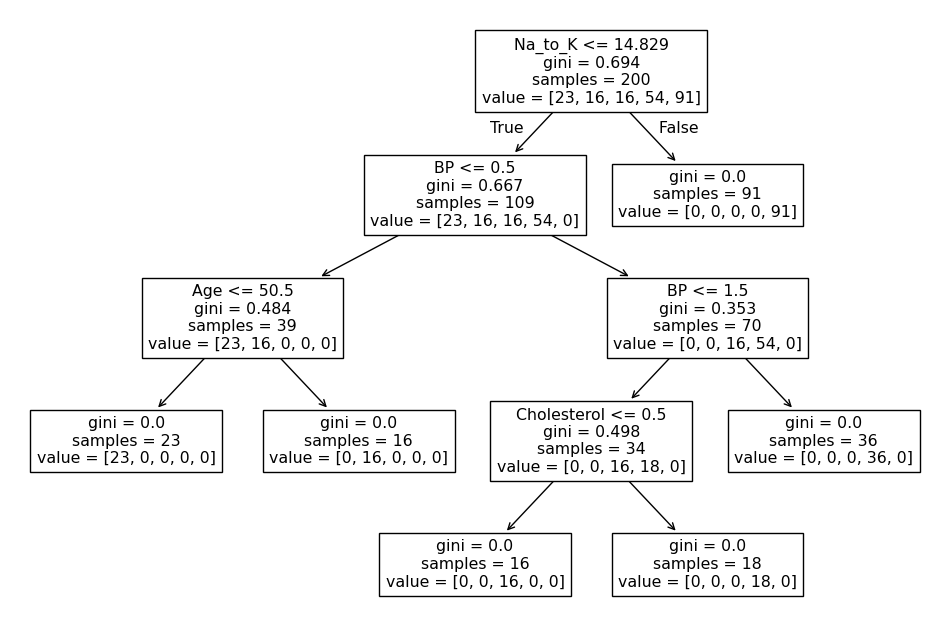

In [32]:
y=data['Drug']
x=data.drop('Drug',axis=1)
dtree=DecisionTreeClassifier()
dtree.fit(x,y)
plt.figure(figsize=(12,8))
plot_tree(dtree,feature_names=x.columns)
plt.show()